# Group Assignment - Lead Scoring Case Study

### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.  

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

### Goal
The company requires to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Task 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

##### SubTask 1.1: Let us first import the required libraries

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

# To Scale our data
from sklearn.preprocessing import scale

##### SubTask 1.2: Reading the leads dataset

In [3]:
# Importing the leads dataset
leads_df = pd.read_csv('Leads.csv')

In [4]:
# Checking the head of the dataset
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


##### SubTask 1.3: Inspect the various aspects of the leads dataframe

In [5]:
leads_df.shape

(9240, 37)

In [6]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [7]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Task 2: Cleaning and preparing the Data

##### SubTask 2.1: Checking for missing values in leads dataframe

In [8]:
# Number of missing values in each column.
print(leads_df.isnull().sum()) 

# Getting the column-wise null percentage
round(100*(leads_df.isnull().sum()/len(leads_df.index)),2)   


Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

- As we can see from above, there are missing values in leads dataframe

##### SubTask 2.2: Cleaning missing values in leads dataframe

In [9]:
# We will drop all columns having more than 30% of values = null.

leads_df.dropna(axis=1, thresh=int(0.7*len(leads_df)), inplace=True)

# Inspecting again
round(100*(leads_df.isnull().sum()/len(leads_df.index)),2) 

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

##### SubTask 2.3: Checking for unique values and duplicate records in  leads dataframe

In [10]:
# Checking unique values in each column

leads_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [11]:
# We can see that many columns have only 1 unique value. We can drop these columns as well.

for col in leads_df.columns:
    if len(leads_df[col].unique()) == 1:
        leads_df.drop(col,inplace=True,axis=1)

In [12]:
leads_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums          

In [13]:
# For all columns having two values let's get count per value.

for col in leads_df.columns:
    if len(leads_df[col].unique()) == 2:
        print(leads_df.groupby([col]).size())

Do Not Email
No     8506
Yes     734
dtype: int64
Do Not Call
No     9238
Yes       2
dtype: int64
Converted
0    5679
1    3561
dtype: int64
Search
No     9226
Yes      14
dtype: int64
Newspaper Article
No     9238
Yes       2
dtype: int64
X Education Forums
No     9239
Yes       1
dtype: int64
Newspaper
No     9239
Yes       1
dtype: int64
Digital Advertisement
No     9236
Yes       4
dtype: int64
Through Recommendations
No     9233
Yes       7
dtype: int64
A free copy of Mastering The Interview
No     6352
Yes    2888
dtype: int64


In [14]:
# Except for 'Converted' and 'A free copy of Mastering The Interview' columns there isnt much variations 
# in above columns.
# We can drop all these columns
leads_df.drop(['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'],axis=1, inplace=True)

In [15]:
print(leads_df.isnull().sum()) 

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Lead Profile                                     2709
City                                             1420
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64


In [16]:
# Inspecting the columns with high number of nulls 
leads_df['Country'].unique()

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [17]:
leads_df['Specialization'].unique()

array(['Select', 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [18]:
# We can see that there are many values is having 'Select', which is equivalent to null as the user didnt select any value.
leads_df['Specialization'] = leads_df['Specialization'].replace('Select', np.nan)

In [19]:
# Inspecting the columns with high number of nulls 
leads_df['How did you hear about X Education'].unique()

array(['Select', 'Word Of Mouth', 'Other', nan, 'Online Search',
       'Multiple Sources', 'Advertisements', 'Student of SomeSchool',
       'Email', 'Social Media', 'SMS'], dtype=object)

In [20]:
# We can see that there are many values is having 'Select', which is equivalent to null as the user didnt select any value.
leads_df['How did you hear about X Education'] = leads_df['How did you hear about X Education'].replace('Select', np.nan)

In [21]:
# Inspecting the columns with high number of nulls 
leads_df['What is your current occupation'].unique()

array(['Unemployed', 'Student', nan, 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

In [22]:
# Inspecting the columns with high number of nulls 
leads_df['What matters most to you in choosing a course'].unique()

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

In [23]:
# Inspecting the columns with high number of nulls 
leads_df['Lead Profile'].unique()

array(['Select', 'Potential Lead', nan, 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

In [24]:
# We can see that there are many values is having 'Select', which is equivalent to null as the user didnt select any value.
leads_df['Lead Profile'] = leads_df['Lead Profile'].replace('Select', np.nan)

In [25]:
# Inspecting the columns with high number of nulls 
leads_df['City'].unique()

array(['Select', 'Mumbai', nan, 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [26]:
# We can see that there are many values is having 'Select', which is equivalent to null as the user didnt select any value.
leads_df['City'] = leads_df['City'].replace('Select', np.nan)

In [27]:
# Inspecting the number of nulls again
print(leads_df.isnull().sum()) 

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Lead Profile                                     6855
City                                             3669
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64


In [28]:
# We will drop all columns having more than 30% of values = null.
leads_df.dropna(axis=1, thresh=int(0.7*len(leads_df)), inplace=True)

In [29]:
# Inspecting the number of nulls again
print(leads_df.isnull().sum())

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
What is your current occupation                  2690
What matters most to you in choosing a course    2709
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64


In [30]:
# We can drop all rows having total visits = null as there are only 137 such rows which is less than 1% of total data.
leads_df = leads_df[~np.isnan(leads_df['TotalVisits'])]

In [31]:
print(leads_df.isnull().sum())

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        29
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                          2324
What is your current occupation                  2683
What matters most to you in choosing a course    2702
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64


In [32]:
leads_df.groupby(['Country']).size()

Country
Asia/Pacific Region        2
Australia                 13
Bahrain                    7
Bangladesh                 2
Belgium                    2
Canada                     4
China                      2
Denmark                    1
France                     6
Germany                    4
Ghana                      2
Hong Kong                  7
India                   6492
Indonesia                  1
Italy                      2
Kenya                      1
Kuwait                     4
Liberia                    1
Malaysia                   1
Netherlands                2
Nigeria                    4
Oman                       6
Philippines                2
Qatar                     10
Russia                     1
Saudi Arabia              21
Singapore                 24
South Africa               4
Sri Lanka                  1
Sweden                     3
Switzerland                1
Tanzania                   1
Uganda                     2
United Arab Emirates      53
United

In [33]:
# We can see that out of remaining 9103 rows ~6492 belongs to Country India and 2324 are nulls. So, we can drop this column all.

leads_df.drop('Country', axis=1, inplace=True)

In [34]:
leads_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        29
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
What is your current occupation                  2683
What matters most to you in choosing a course    2702
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64

In [35]:
leads_df.groupby(['Lead Source']).size()

Lead Source
Click2call              4
Direct Traffic       2543
Facebook               31
Google               2868
Live Chat               2
NC_EDM                  1
Olark Chat           1753
Organic Search       1154
Pay per Click Ads       1
Press_Release           2
Reference             443
Referral Sites        125
Social Media            2
WeLearn                 1
Welingak Website      129
bing                    6
blog                    1
google                  5
testone                 1
welearnblog_Home        1
youtubechannel          1
dtype: int64

In [36]:
# Lead Source have different variety, so we can impute the nas as Others

leads_df['Lead Source'] = leads_df['Lead Source'].replace(np.nan, 'Other')

In [37]:
leads_df.groupby(['What is your current occupation']).size()

What is your current occupation
Businessman                8
Housewife                  9
Other                     15
Student                  207
Unemployed              5502
Working Professional     679
dtype: int64

In [38]:
# Imputing nulls as Other
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'Other')

In [39]:
leads_df.groupby(['What matters most to you in choosing a course']).size()

What matters most to you in choosing a course
Better Career Prospects      6399
Flexibility & Convenience       1
Other                           1
dtype: int64

In [40]:
# We can see that out of remaining 9103 rows ~6399 belongs to 1 category and 2702 are nulls. So we can drop this column

leads_df.drop('What matters most to you in choosing a course', axis=1, inplace=True)

In [41]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


In [42]:
leads = leads_df.drop(['Prospect ID', 'Lead Number'], axis=1)

In [43]:
leads

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.00,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,0,5.0,674,2.50,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.00,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.00,Unreachable,Unemployed,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.00,Converted to Lead,Unemployed,No,Modified
5,API,Olark Chat,0,0.0,0,0.00,Olark Chat Conversation,Other,No,Modified
6,Landing Page Submission,Google,1,2.0,1640,2.00,Email Opened,Unemployed,No,Modified
7,API,Olark Chat,0,0.0,0,0.00,Olark Chat Conversation,Other,No,Modified
8,Landing Page Submission,Direct Traffic,0,2.0,71,2.00,Email Opened,Other,Yes,Email Opened
9,API,Google,0,4.0,58,4.00,Email Opened,Other,No,Email Opened


In [44]:
# Converting all the string data into lowercase

str_cols = leads.select_dtypes(['object'])

str_cols.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [45]:
# Getting all unique values column wise
for col_name in str_cols.columns:
    print(col_name)
    print(leads[col_name].unique())


Lead Origin
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import']
Lead Source
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Reference' 'google' 'Welingak Website' 'Facebook' 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'Other' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
Last Activity
['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' 'SMS Sent'
 'Visited Booth in Tradeshow' 'Approached upfront'
 'Resubscribed to emails' 'Email Received' 'Email Marked Spam']
What is your current occupation
['Unemployed' 'Student' 'Other' 'Working Professional' 'Businessman'
 'Housewife']
A free copy of Mastering The Interview
['No' 'Yes']
Last Notable Activity
['Modified' 'Email Opened' 'Page Visited on Web

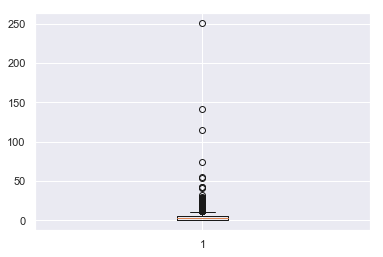

In [46]:
# Identifying outliers for numerical columns

plt.boxplot(leads.TotalVisits)
Q1 = leads.TotalVisits.quantile(0.25)
Q3 = leads.TotalVisits.quantile(0.75)
IQR = Q3 - Q1
leads = leads[(leads.TotalVisits >= Q1 - 1.5*IQR) & (leads.TotalVisits <= Q3 + 1.5*IQR)]

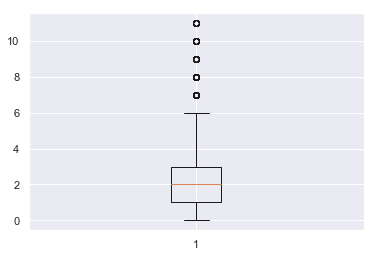

In [47]:
# Identifying outliers for numerical columns

plt.boxplot(leads['Page Views Per Visit'])
Q1 = leads['Page Views Per Visit'].quantile(0.25)
Q3 = leads['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
leads = leads[(leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads['Page Views Per Visit'] <= Q3 + 1.5*IQR)]


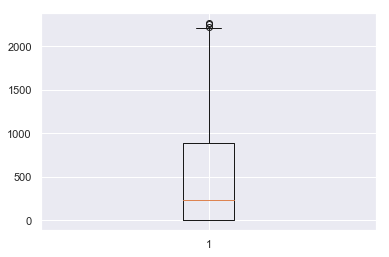

In [48]:
# Identifying outliers for numerical columns

plt.boxplot(leads['Total Time Spent on Website'])
Q1 = leads['Total Time Spent on Website'].quantile(0.25)
Q3 = leads['Total Time Spent on Website'].quantile(0.75)
IQR = Q3 - Q1
leads = leads[(leads['Total Time Spent on Website'] >= Q1 - 1.5*IQR) & (leads['Total Time Spent on Website'] <= Q3 + 1.5*IQR)]

In [49]:
leads.shape

(8539, 10)

##### SubTask 2.4: Converting categorical fields to numerical

In [50]:
# Converting categorical fields having only two unique values to binary
leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].map({ 'Yes': 1,'No': 0})


In [51]:
# Checking for remaining categorical variables.
leads.select_dtypes(['object']).head(5)

,Lead Origin,Lead Source,Last Activity,What is your current occupation,Last Notable Activity
0,API,Olark Chat,Page Visited on Website,Unemployed,Modified
1,API,Organic Search,Email Opened,Unemployed,Email Opened
2,Landing Page Submission,Direct Traffic,Email Opened,Student,Email Opened
3,Landing Page Submission,Direct Traffic,Unreachable,Unemployed,Modified
4,Landing Page Submission,Google,Converted to Lead,Unemployed,Modified


##### SubTask 2.5: Creating Dummy Variables

In [52]:
leads_final = pd.get_dummies(leads, drop_first=True)
leads_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8539 entries, 0 to 9239
Data columns (total 65 columns):
Converted                                               8539 non-null int64
TotalVisits                                             8539 non-null float64
Total Time Spent on Website                             8539 non-null int64
Page Views Per Visit                                    8539 non-null float64
A free copy of Mastering The Interview                  8539 non-null int64
Lead Origin_Landing Page Submission                     8539 non-null uint8
Lead Origin_Lead Add Form                               8539 non-null uint8
Lead Origin_Lead Import                                 8539 non-null uint8
Lead Source_Direct Traffic                              8539 non-null uint8
Lead Source_Facebook                                    8539 non-null uint8
Lead Source_Google                                      8539 non-null uint8
Lead Source_Live Chat                                

## Task 3: Model Building

In [53]:
# Putting response variable to y
y = leads_final['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [54]:
# Putting feature variable to X
X = leads_final.drop(['Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


Let's start by splitting our data into a training set and a test set.

In [55]:
# Splitting the data in test and train datasets. Putting random_state = 100, so that it will always generate same splits.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [56]:
# Rescaling features using standard scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,5.977000e+03,5.977000e+03,5.977000e+03,5977.000000,5977.000000,5977.000000,5977.000000,5977.000000,5977.000000,5977.000000,...,5977.0,5977.000000,5977.000000,5977.000000,5977.000000,5977.000000,5977.000000,5977.000000,5977.000000,5977.000000
mean,1.996990e-16,-1.381974e-17,1.246888e-16,0.296637,0.517651,0.070604,0.003346,0.271876,0.003179,0.324745,...,0.0,0.001338,0.370085,0.019575,0.028610,0.000167,0.235737,0.003179,0.004517,0.000167
std,1.000084e+00,1.000084e+00,1.000084e+00,0.456813,0.499730,0.256184,0.057754,0.444963,0.056296,0.468319,...,0.0,0.036564,0.482868,0.138546,0.166721,0.012935,0.424494,0.056296,0.067065,0.012935
min,-1.148041e+00,-8.588836e-01,-1.254065e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.148041e+00,-8.588836e-01,-1.254065e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.604910e-02,-4.334443e-01,-4.070647e-02,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.840792e-01,7.655209e-01,5.659726e-01,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.340290e+00,3.137667e+00,2.386010e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
# Checking the lead conversion Rate
converted = (sum(leads_final['Converted'])/len(leads_final['Converted'].index))*100
converted

37.83815435062653

Looking at Correlations

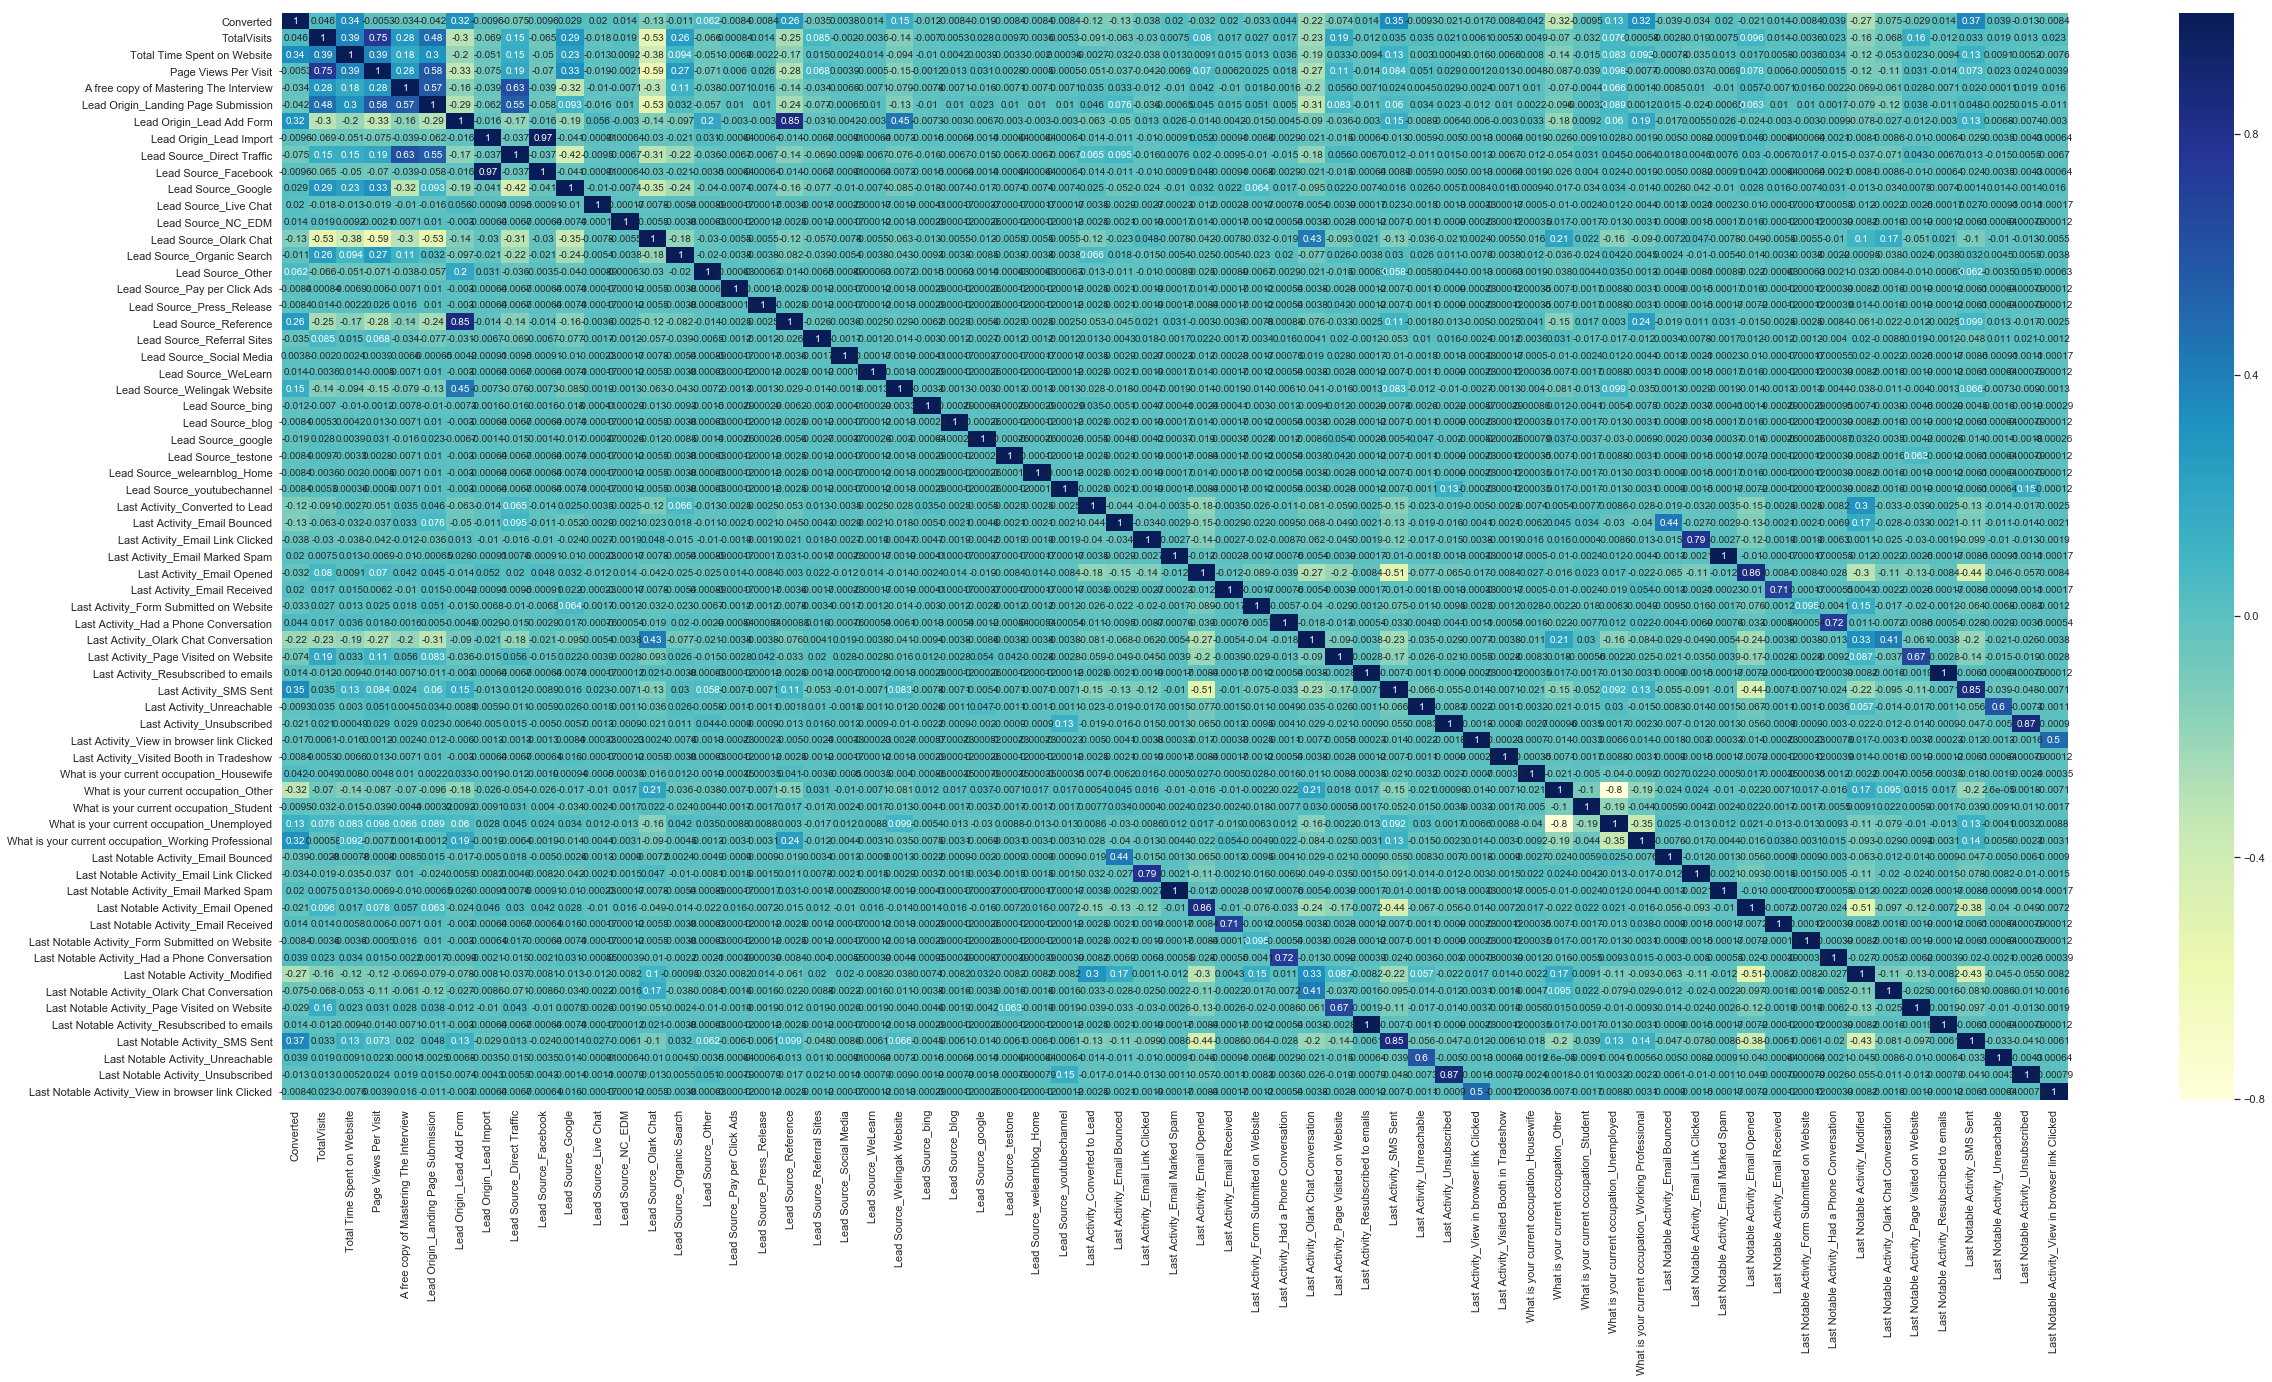

In [58]:
# Let's see the correlation matrix 
plt.figure(figsize = (40,20))      # Size of the figure
sns.heatmap(leads_final.corr(),annot = True, cmap="YlGnBu")
plt.show()

###### Below are the pairs of highly correlated features

- Last Notable Activity_Email Marked Spam &  Last Activity_Email Marked Spam 

- Last Activity_Resubscribed to emails & Last Notable Activity_Resubscribed to emails

- Last Notable Activity_Unsubscribed & Last Activity_Unsubscribed

- Last Notable Activity_SMS Sent & Last Activity_SMS Sent 

- Last Activity_Email Opened & Last Notable Activity_Email Opened

- Lead Origin_Lead Add Form & Lead Source_Reference

- Last Notable Activity_Email Link Clicked  & Last Activity_Email Link Clicked 

- Last Notable Activity_Had a Phone Conversation & Last Activity_Had a Phone Conversation

##### Dropping highly correlated dummy variables

In [59]:
#Dropping one feature from each pair of highly correlated features

X_test = X_test.drop(['Last Activity_Email Marked Spam','Last Activity_Resubscribed to emails','Last Activity_Unsubscribed','Last Activity_SMS Sent','Last Activity_Email Opened',
                      'Lead Source_Reference','Last Activity_Email Link Clicked','Last Activity_Had a Phone Conversation'], 1)
X_train = X_train.drop(['Last Activity_Email Marked Spam','Last Activity_Resubscribed to emails','Last Activity_Unsubscribed','Last Activity_SMS Sent','Last Activity_Email Opened',
                     'Lead Source_Reference','Last Activity_Email Link Clicked','Last Activity_Had a Phone Conversation'], 1)

After dropping highly correlated variables now let's check the correlation matrix again.

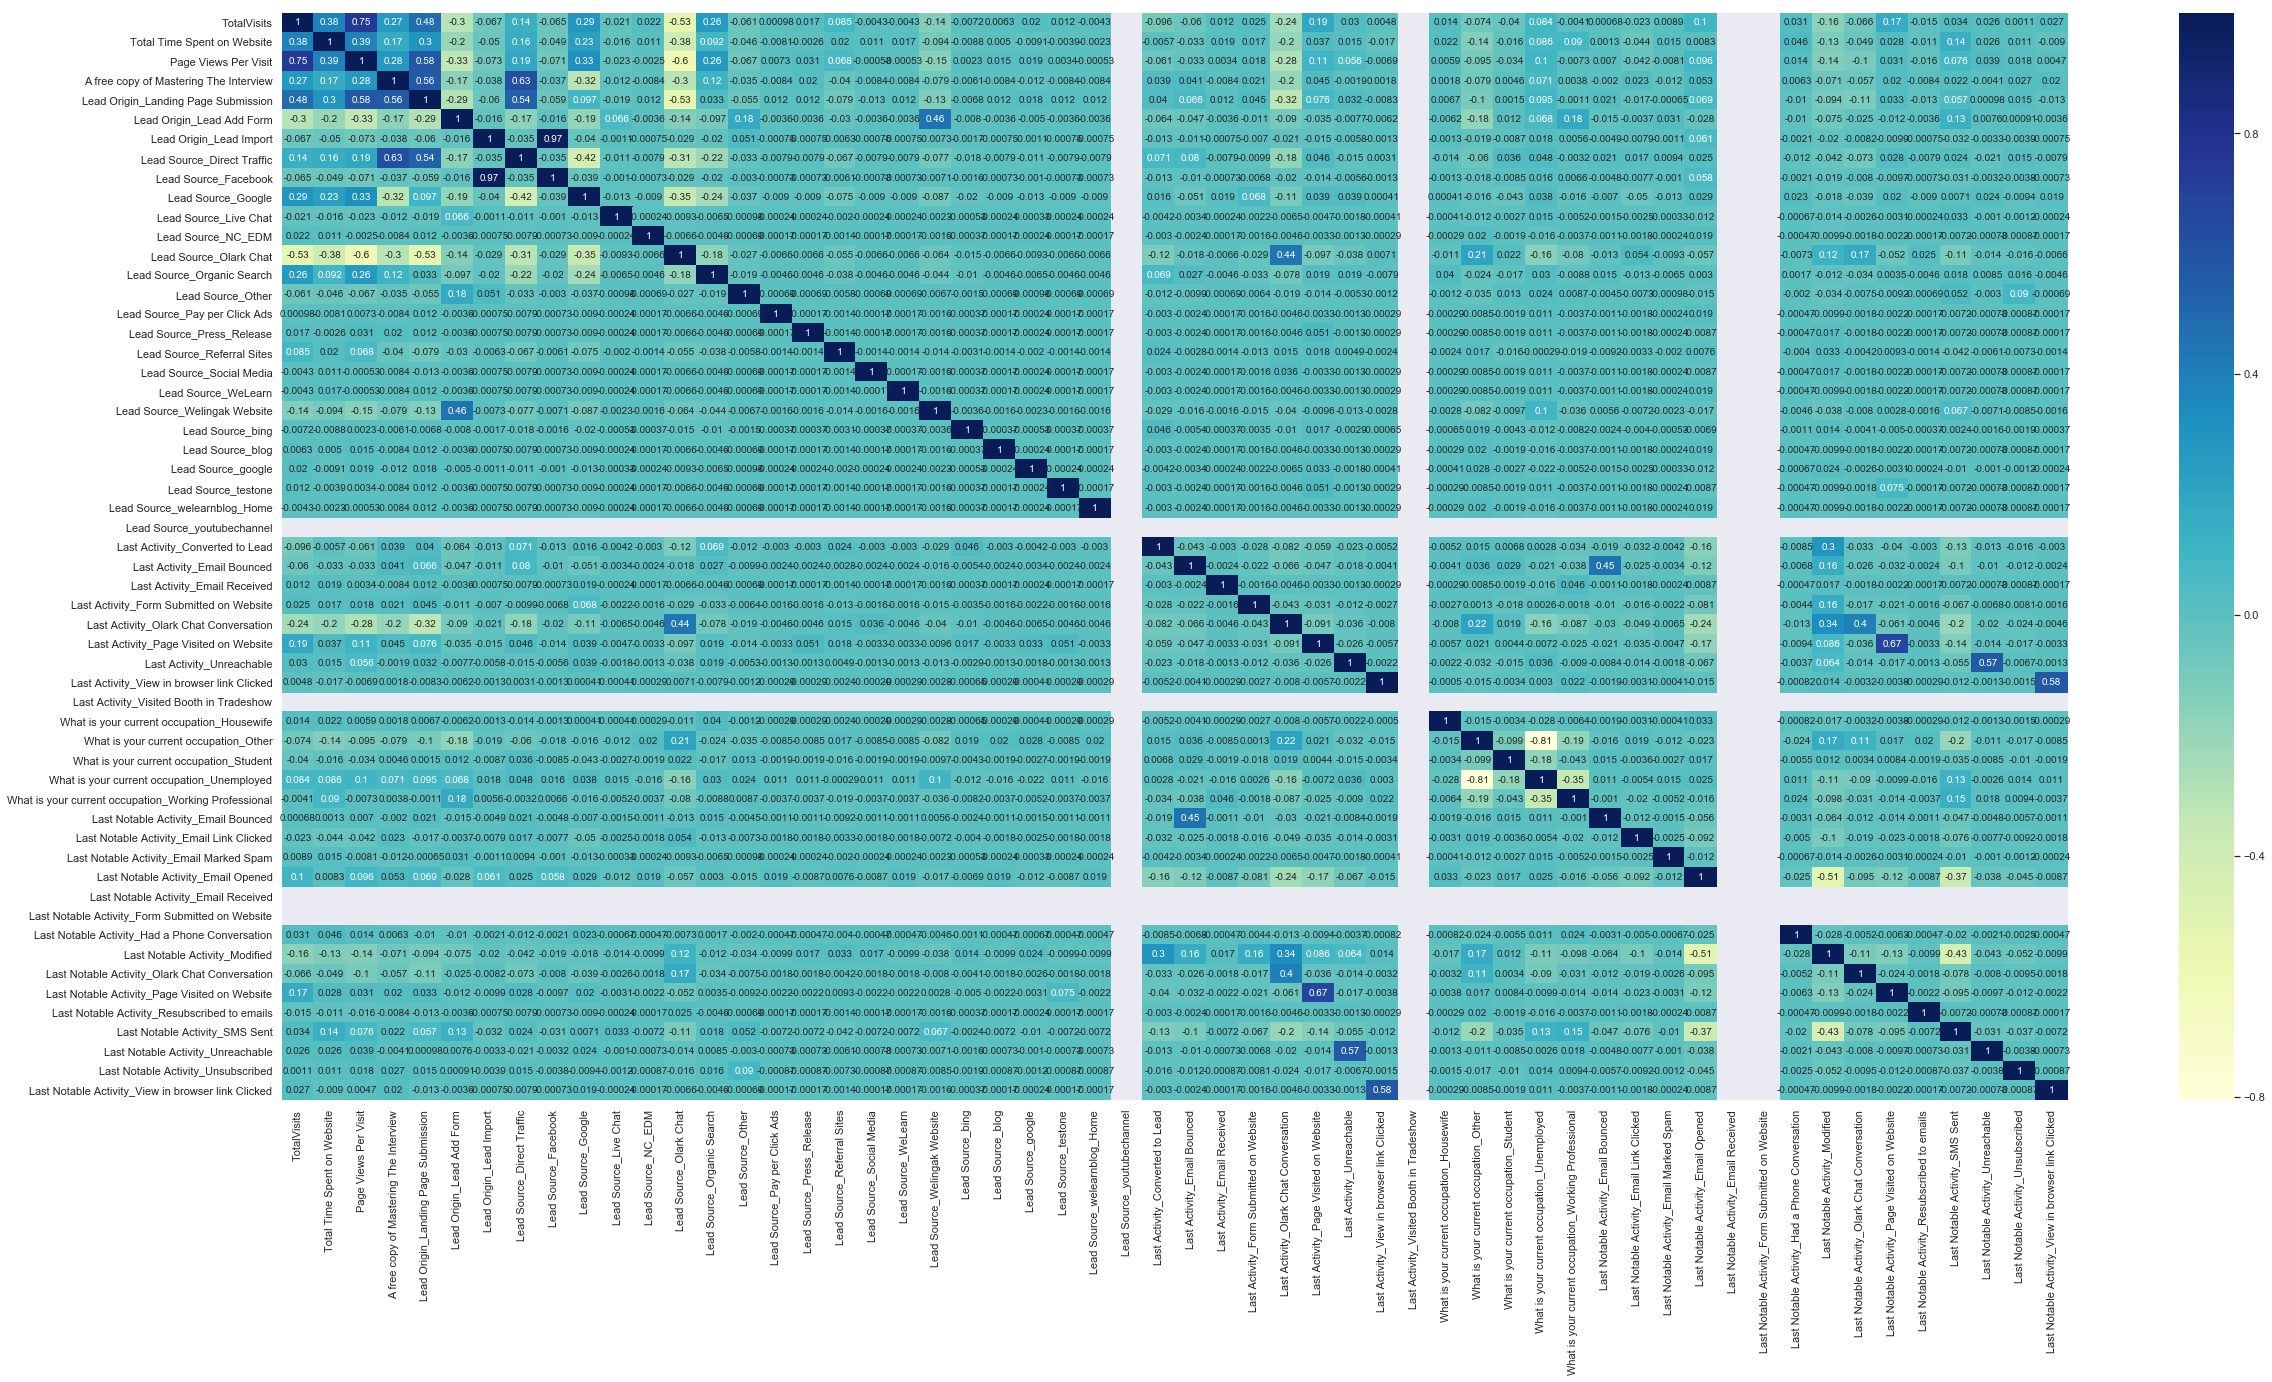

In [60]:
plt.figure(figsize = (40,20))
sns.heatmap(X_train.corr(),annot = True, cmap="YlGnBu")
plt.show()

In [61]:
import statsmodels.api as sm

In [62]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5977
Model:                            GLM   Df Residuals:                     5924
Model Family:                Binomial   Df Model:                           52
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 03 Mar 2019   Deviance:                          nan
Time:                        19:35:55   Pearson chi2:                 6.05e+18
No. Iterations:                   100   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                  4.27e+15    8.9e+07    4.8e+07      0.000    4.27e+15    4.27e+15
TotalVisits                                          -2.552e+14   1.44e+06  -1.77e+08      0.000   -2.55e+14   -2.55e+14
Total Time Spent on Website                           8.168e+14   1.02e+06   8.04e+08      0.000    8.17e+14    8.17e+14
Page Views Per Visit                                  7.137e+13   1.61e+06   4.45e+07      0.000    7.14e+13    7.14e+13
A free copy of Mastering The Interview                -7.43e+12   2.79e+06  -2.66e+06      0.000   -7.43e+12   -7.43e+12
Lead Origin_Landing Page Submission                   3.173e+14   2.82e+06   1.12e+08      0.000    3.17e+14    3.17e+14
Lead Origin_Lead Add Form                             6.644e+14   4.75e+07    1.4e+07      0.000    6.64e+14    6.64e+14
Lead Origin_Lead Import                              -5.032e+15    8.4e+07  -5.99e+07      0.000   -5.03e+15   -5.03e+15
Lead Source_Direct Traffic                           -1.455e+15   4.77e+07  -3.05e+07      0.000   -1.46e+15   -1.46e+15
Lead Source_Facebook                                  4.217e+15    7.1e+07   5.94e+07      0.000    4.22e+15    4.22e+15
Lead Source_Google                                   -1.181e+15   4.77e+07  -2.48e+07      0.000   -1.18e+15   -1.18e+15
Lead Source_Live Chat                                 3.936e+15   4.76e+07   8.26e+07      0.000    3.94e+15    3.94e+15
Lead Source_NC_EDM                                    2.938e+15   8.24e+07   3.56e+07      0.000    2.94e+15    2.94e+15
Lead Source_Olark Chat                               -1.342e+15   4.77e+07  -2.81e+07      0.000   -1.34e+15   -1.34e+15
Lead Source_Organic Search                           -1.131e+15   4.78e+07  -2.37e+07      0.000   -1.13e+15   -1.13e+15
Lead Source_Other                                    -6.908e+13   1.73e+07  -3.99e+06      0.000   -6.91e+13   -6.91e+13
Lead Source_Pay per Click Ads                        -5.424e+15   8.24e+07  -6.58e+07      0.000   -5.42e+15   -5.42e+15
Lead Source_Press_Release                            -5.147e+15   8.26e+07  -6.24e+07      0.000   -5.15e+15   -5.15e+15
Lead Source_Referral Sites                           -1.249e+15   4.84e+07  -2.58e+07      0.000   -1.25e+15   -1.25e+15
Lead Source_Social Media                               2.71e+15   8.24e+07   3.29e+07      0.000    2.71e+15    2.71e+15
Lead Source_WeLearn                                    1.93e+15   8.24e+07   2.34e+07      0.000    1.93e+15    1.93e+15
Lead Source_Welingak Website                          3.973e+14   8.03e+06   4.95e+07      0.000    3.97e+14    3.97e+14
Lead Source_bing                                     -1.415e+15   5.64e+07  -2.51e+07      0.000   -1.42e+15   -1.42e+15
Lead Source_blog

#### Feature Selection Using RFE

In [63]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [64]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [65]:
rfe.support_

array([False,  True, False, False, False,  True, False,  True, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
        True,  True, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
       False, False])

In [66]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 15),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 17),
 ('A free copy of Mastering The Interview', False, 35),
 ('Lead Origin_Landing Page Submission', False, 26),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 33),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 34),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 32),
 ('Lead Source_NC_EDM', False, 9),
 ('Lead Source_Olark Chat', False, 10),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Other', False, 38),
 ('Lead Source_Pay per Click Ads', False, 23),
 ('Lead Source_Press_Release', False, 29),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 8),
 ('Lead Source_WeLearn', False, 21),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 36),
 ('Lead Source_blog', False, 25),
 ('Lead Source_google', False, 28),
 ('Lead Source_testone', False, 20),

In [67]:
col = X_train.columns[rfe.support_]

In [68]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Other',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_

#### Assessing the model with StatsModels

In [69]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5977
Model:                            GLM   Df Residuals:                     5961
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2390.2
Date:                Sun, 03 Mar 2019   Deviance:                       4780.4
Time:                        19:35:57   Pearson chi2:                 5.82e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1810      0.097      1.865      0.062      -0.009       0.371
Total Time Spent on Website                              1.1037      0.042     26.221      0.000       1.021       1.186
Lead Origin_Lead Add Form                                2.1949      0.216     10.176      0.000       1.772       2.618
Lead Source_Direct Traffic                              -1.5500      0.122    -12.728      0.000      -1.789      -1.311
Lead Source_Google                                      -1.1601      0.116    -10.028      0.000      -1.387      -0.933
Lead Source_Organic Search                              -1.2678      0.144     -8.813      0.000      -1.550      -0.986
Lead Source_Referral Sites                              -1.4490      0.372     -3.893      0.000      -2.179      -0.719
Lead Source_Welingak Website                             2.7696      1.037      2.671      0.008       0.738       4.802
Last Activity_Converted to Lead                         -1.1296      0.216     -5.228      0.000      -1.553      -0.706
Last Activity_Email Bounced                             -2.3408      0.401     -5.834      0.000      -3.127      -1.554
Last Activity_Olark Chat Conversation                   -1.5331      0.175     -8.762      0.000      -1.876      -1.190
What is your current occupation_Other                   -1.1773      0.091    -12.892      0.000      -1.356      -0.998
What is your current occupation_Working Professional     2.5649      0.197     12.989      0.000       2.178       2.952
Last Notable Activity_Had a Phone Conversation          21.9653   1.46e+04      0.002      0.999   -2.85e+04    2.86e+04
Last Notable Activity_SMS Sent                           1.3597      0.084     16.272      0.000       1.196       1.523
Last Notable Activity_Unreachable                        1.9331      0.650      2.972      0.003       0.658       3.208
========================================================================================================================
"""

In [70]:
# Dropping column 'Last Notable Activity_Had a Phone Conversation' having high p-value.
col = col.drop('Last Notable Activity_Had a Phone Conversation', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [71]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5977
Model:                            GLM   Df Residuals:                     5962
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2393.9
Date:                Sun, 03 Mar 2019   Deviance:                       4787.9
Time:                        19:35:57   Pearson chi2:                 5.83e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1859      0.097      1.917      0.055      -0.004       0.376
Total Time Spent on Website                              1.1055      0.042     26.277      0.000       1.023       1.188
Lead Origin_Lead Add Form                                2.1924      0.216     10.166      0.000       1.770       2.615
Lead Source_Direct Traffic                              -1.5527      0.122    -12.754      0.000      -1.791      -1.314
Lead Source_Google                                      -1.1555      0.116    -10.000      0.000      -1.382      -0.929
Lead Source_Organic Search                              -1.2649      0.144     -8.803      0.000      -1.547      -0.983
Lead Source_Referral Sites                              -1.4525      0.372     -3.901      0.000      -2.182      -0.723
Lead Source_Welingak Website                             2.7705      1.037      2.672      0.008       0.738       4.803
Last Activity_Converted to Lead                         -1.1359      0.216     -5.256      0.000      -1.559      -0.712
Last Activity_Email Bounced                             -2.3465      0.401     -5.847      0.000      -3.133      -1.560
Last Activity_Olark Chat Conversation                   -1.5372      0.175     -8.783      0.000      -1.880      -1.194
What is your current occupation_Other                   -1.1823      0.091    -12.948      0.000      -1.361      -1.003
What is your current occupation_Working Professional     2.5661      0.197     13.003      0.000       2.179       2.953
Last Notable Activity_SMS Sent                           1.3545      0.084     16.214      0.000       1.191       1.518
Last Notable Activity_Unreachable                        1.9271      0.651      2.961      0.003       0.652       3.203
========================================================================================================================
"""

###### What are the top three variables in your model which contribute most towards the probability of a lead getting converted?

- What is your current occupation
- Lead Source
- Lead Origin

##### What are the top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion?

- current occupation - Working Professional
- Lead Source - Welingak Website
- Lead Origin - Lead Add Form

In [72]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3435    0.657551
6911    0.010590
5030    0.643579
7790    0.069066
1482    0.231050
2297    0.134203
4840    0.410365
7740    0.053148
3345    0.125008
7151    0.125008
dtype: float64

In [73]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.65755059, 0.01058994, 0.64357859, 0.06906591, 0.23104955,
       0.13420341, 0.4103647 , 0.05314818, 0.12500832, 0.12500832])


Creating a dataframe with the actual conversion flag and the predicted probabilities


In [74]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['IndexId'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,IndexId
0,1,0.657551,3435
1,0,0.010590,6911
2,0,0.643579,5030
3,0,0.069066,7790
4,0,0.231050,1482


Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [75]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,IndexId,predicted
0,1,0.657551,3435,1
1,0,0.010590,6911,0
2,0,0.643579,5030,1
3,0,0.069066,7790,0
4,0,0.231050,1482,0


In [76]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3338  400]
 [ 679 1560]]


    - Predicted            not_converted    converted
    - Actual
    - not_converted        3510                443
    - converted            792                 1627  

In [77]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8194746528358708


Checking VIFs

In [78]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.51
10,What is your current occupation_Other,1.46
3,Lead Source_Google,1.39
12,Last Notable Activity_SMS Sent,1.39
2,Lead Source_Direct Traffic,1.34
6,Lead Source_Welingak Website,1.31
0,Total Time Spent on Website,1.24
9,Last Activity_Olark Chat Conversation,1.19
11,What is your current occupation_Working Profes...,1.17
4,Lead Source_Organic Search,1.15


#### Metrics beyond simply accuracy

In [80]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [81]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6967396158999554

In [82]:
# Let us calculate specificity
TN / float(TN+FP)

0.8929909042268592

In [83]:
# Calculate false postive rate - predicting converted when lead does not get converted
print(FP/ float(TN+FP))

0.10700909577314072


In [84]:
# positive predictive value 
print (TP / float(TP+FP))

0.7959183673469388


In [85]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8309683843664426


#### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [86]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [87]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

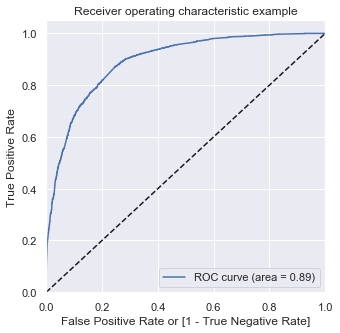

In [88]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [89]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,IndexId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.657551,3435,1,1,1,1,1,1,1,1,0,0,0
1,0,0.010590,6911,0,1,0,0,0,0,0,0,0,0,0
2,0,0.643579,5030,1,1,1,1,1,1,1,1,0,0,0
3,0,0.069066,7790,0,1,0,0,0,0,0,0,0,0,0
4,0,0.231050,1482,0,1,1,1,0,0,0,0,0,0,0


In [90]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.374603  1.000000  0.000000
0.1   0.1  0.632759  0.974989  0.427769
0.2   0.2  0.768111  0.914247  0.680578
0.3   0.3  0.794546  0.876284  0.745586
0.4   0.4  0.815961  0.767753  0.844837
0.5   0.5  0.819475  0.696740  0.892991
0.6   0.6  0.808265  0.622599  0.919476
0.7   0.7  0.785009  0.511389  0.948903
0.8   0.8  0.766605  0.431443  0.967362
0.9   0.9  0.721432  0.278696  0.986624


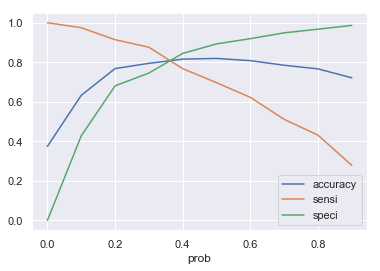

In [91]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [92]:
#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [93]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,IndexId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.657551,3435,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.010590,6911,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.643579,5030,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.069066,7790,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.231050,1482,0,1,1,1,0,0,0,0,0,0,0,0


In [94]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8084323239083152

In [95]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3031,  707],
       [ 438, 1801]], dtype=int64)

In [96]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [97]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8043769539973202

In [98]:
# Let us calculate specificity
TN / float(TN+FP)

0.8108614232209738

In [99]:
# Calculate false postive rate - predicting converted when lead does not get converted
print(FP/ float(TN+FP))

0.1891385767790262


In [100]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7181020733652312


In [101]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8737388296339003


Precision and Recall

# Looking at the confusion matrix again

In [102]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3338,  400],
       [ 679, 1560]], dtype=int64)

##### Precision = TP / TP + FP


In [103]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7959183673469388

##### Recall = TP / TP + FN

In [104]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6967396158999554

Using sklearn utilities for the same

In [105]:
from sklearn.metrics import precision_score, recall_score

In [106]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7959183673469388

In [107]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6967396158999554

### Precision and recall tradeoff

In [108]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       0
 3       0
 4       0
 5       0
 6       0
 7       0
 8       0
 9       0
 10      1
 11      1
 12      1
 13      1
 14      0
 15      1
 16      1
 17      0
 18      0
 19      1
 20      1
 21      1
 22      0
 23      1
 24      1
 25      0
 26      0
 27      1
 28      0
 29      0
        ..
 5947    0
 5948    0
 5949    1
 5950    1
 5951    0
 5952    0
 5953    1
 5954    1
 5955    0
 5956    0
 5957    0
 5958    0
 5959    0
 5960    1
 5961    1
 5962    1
 5963    1
 5964    1
 5965    0
 5966    0
 5967    0
 5968    0
 5969    1
 5970    1
 5971    1
 5972    0
 5973    0
 5974    0
 5975    0
 5976    1
 Name: Converted, Length: 5977, dtype: int64, 0       1
 1       0
 2       1
 3       0
 4       0
 5       0
 6       0
 7       0
 8       0
 9       0
 10      1
 11      0
 12      1
 13      0
 14      0
 15      1
 16      0
 17      1
 18      0
 19      1
 20      1
 21      1
 22      0
 23      1
 24      0
 25      

In [109]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

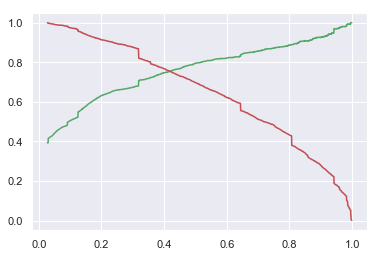

In [110]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Making predictions on the test set

In [111]:
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [112]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Other,What is your current occupation_Working Professional,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
1043,-0.858884,0,0,0,0,0,0,0,0,0,0,0,0,0
4328,-0.547632,0,0,0,0,0,0,0,0,0,1,0,0,0
7764,1.944227,0,1,0,0,0,0,0,0,0,0,0,0,0
2418,1.947911,0,0,1,0,0,0,0,0,1,0,0,0,0
4459,-0.577099,0,0,1,0,0,0,0,0,1,0,0,0,0


In [113]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [114]:
y_test_pred = res.predict(X_test_sm)

In [115]:
y_test_pred[:10]

1043    0.317874
4328    0.167737
7764    0.686219
2418    0.412562
4459    0.041299
647     0.216898
9199    0.091062
4467    0.396512
5194    0.099913
8327    0.429434
dtype: float64

In [116]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [117]:
# Let's see the head
y_pred_1.head()

,0
1043,0.317874
4328,0.167737
7764,0.686219
2418,0.412562
4459,0.041299


In [118]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [119]:
# Putting CustID to index
y_test_df['IndexID'] = y_test_df.index

In [120]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [121]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [122]:
y_pred_final.head()

,Converted,IndexID,0
0,1,1043,0.317874
1,0,4328,0.167737
2,1,7764,0.686219
3,1,2418,0.412562
4,0,4459,0.041299


In [123]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [124]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['IndexID','Converted','Conversion_Prob'], axis=1)

In [125]:
# Let's see the head of y_pred_final
y_pred_final.head()

,IndexID,Converted,Conversion_Prob
0,1043,1,0.317874
1,4328,0,0.167737
2,7764,1,0.686219
3,2418,1,0.412562
4,4459,0,0.041299


In [126]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)

In [127]:
y_pred_final.head()

,IndexID,Converted,Conversion_Prob,final_predicted
0,1043,1,0.317874,0
1,4328,0,0.167737,0
2,7764,1,0.686219,1
3,2418,1,0.412562,1
4,4459,0,0.041299,0


In [128]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8126463700234192

In [129]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1335,  235],
       [ 245,  747]], dtype=int64)

In [130]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [131]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7530241935483871

In [132]:
# Let us calculate specificity
TN / float(TN+FP)

0.8503184713375797

In [133]:
# Let us calculate precision
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7606924643584522

In [134]:
# Let us calculate recall
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.7530241935483871

In [135]:
# Calculate false postive rate - predicting converted when lead does not get converted
print(FP/ float(TN+FP))

0.14968152866242038


In [136]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7606924643584522


In [137]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8449367088607594


#### Calculating the lead score

In [138]:
# Adding lead score column based on conversion probability on both test and train set

y_pred_final['lead_score'] = y_pred_final['Conversion_Prob']*100
y_train_pred_final['lead_score'] = y_train_pred_final['Conversion_Prob']*100

In [139]:
# Resetting index in both test and train set to join them
y_pred_final.set_index('IndexID', inplace=True)
y_train_pred_final.set_index('IndexId', inplace=True)

In [140]:
# Concatenating the test and train set lead_score

train_lead_score = y_train_pred_final[['lead_score']]
test_lead_score = y_pred_final[['lead_score']]
lead_score_final = pd.concat([train_lead_score, test_lead_score])

In [141]:
# Adding the lead score to leads df which contains the features prior to dummy variable creation
leads['lead_score'] = lead_score_final['lead_score']

In [142]:
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,lead_score
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified,31.787367
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened,34.159478
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened,69.058616
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified,15.507936
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified,46.317877
